# Exploratory Data Analysis Report: Bank Marketing Campaign

## 1. Introduction and Problem Description

**Group Name**: Data Department_1

**Member Details**:
  - **Name**: Minseok Kim
  - **Email**: mxk230041@utdallas.edu
  - **Country**: United States
  - **College/Company**: The University of Texas at Dallas
  - **Specialization**: Data Science

**Problem Description**: The objective of this project is to analyze a Portuguese bank's marketing campaign data to predict the likelihood of customers subscribing to a term deposit. This involves identifying and treating outliers in the dataset to ensure the accuracy and reliability of our predictive models, thus enabling efficient allocation of marketing resources.


## 2. Dataset Introduction

**Data Source**: The dataset is derived from a Portuguese bank's marketing campaigns, focusing on direct phone calls to offer term deposit subscriptions to potential customers.

**Dataset Characteristics**: Includes variables such as age, job, marital status, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, and poutcome. The dataset consists of several thousands of records, each record representing a customer's details and the outcome of the marketing campaign.


## 3. Data Cleaning and Preprocessing

**Missing Value Treatment**: Initial analysis revealed minimal missing values, which were treated by imputation or removal, depending on their impact on the dataset.

**Outlier Detection and Treatment**:
  - **Z-score Method**: Applied to columns with a normal distribution, identifying outliers as data points lying beyond 3 standard deviations from the mean.


In [ ]:
import pandas as pd
import matplotlib
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv("bank.csv", sep = ';')

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns)


      age  balance  day  duration  campaign  pdays  previous
0      30     1787   19        79         1     -1         0
1      33     4789   11       220         1    339         4
2      35     1350   16       185         1    330         1
3      30     1476    3       199         4     -1         0
4      59        0    5       226         1     -1         0
...   ...      ...  ...       ...       ...    ...       ...
4516   33     -333   30       329         5     -1         0
4517   57    -3313    9       153         1     -1         0
4518   57      295   19       151        11     -1         0
4519   28     1137    6       129         4    211         3
4520   44     1136    3       345         2    249         7

[4521 rows x 7 columns]


{'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'}

In [ ]:
def show_hist(df, column):

    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)  # Corrected typo here
    plt.ylabel('count')    # Corrected typo here
    plt.show()

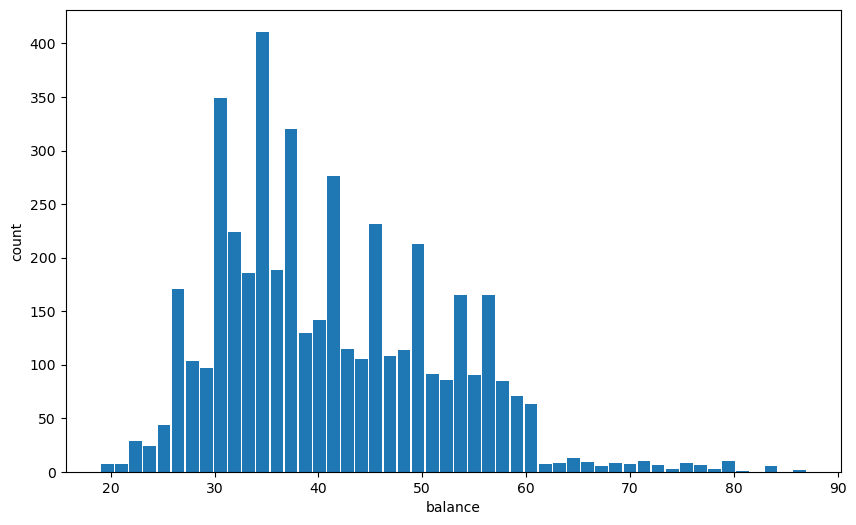

In [ ]:
show_hist('age')

In [ ]:
df['zscore'] = (df.age - df.age.mean()) / df.age.std()

In [ ]:
df_no_outliers_age1 = df[(df.zscore> -3) & (df.zscore < 3)]

In [ ]:
def show_no_outliers (df, column):
    
    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)  # Corrected typo here
    plt.ylabel('count')    # Corrected typo here
    plt.show()

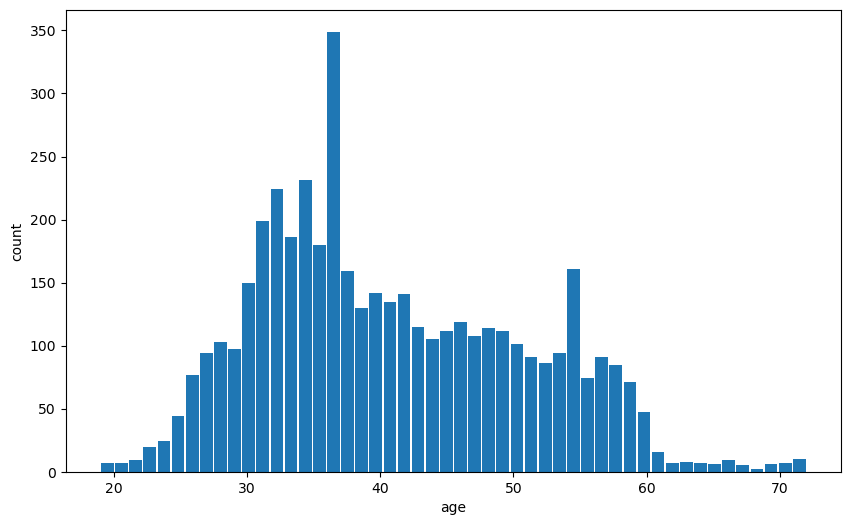

In [ ]:
show_no_outliers (df_no_outliers_age1, 'age')

In [ ]:
df = df_no_outliers

In [ ]:

df['zscore'] = (df.duration - df.duration.mean()) / df.duration.std()
df_no_outliers_age1_balance2_duration3 = df[(df.zscore> -3) & (df.zscore < 3)]
    

/var/folders/zt/3bfd8lcx4tdf3zy37t37r8z80000gn/T/ipykernel_14036/1715287272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = (df.duration - df.duration.mean()) / df.duration.std()


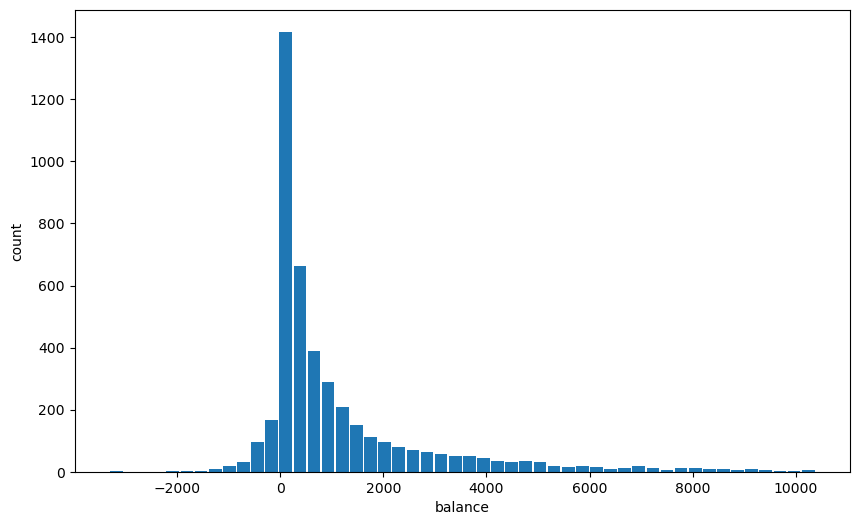

In [ ]:
show_no_outliers (df_no_outliers_age1_balance2, 'balance')

In [ ]:
def no_outliers(df, column):
    df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

    zscore = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()
    
    df_copy.loc[:, 'zscore'] = zscore
    
    df_no_outliers = df_copy[(zscore > -3) & (zscore < 3)]
    
    return df_no_outliers


# Remove outliers from the 'duration' column using the function
df_no_outliers = no_outliers(df, 'duration')

# Display the DataFrame without outliers
print(df_no_outliers)


      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [ ]:
df_no_outliers = no_outliers(df, 'campaign')
df = df_no_outliers
df_no_outliers = no_outliers(df, 'pdays')
df = df_no_outliers
df_no_outliers = no_outliers(df, 'previous')
df = df_no_outliers
df.shape

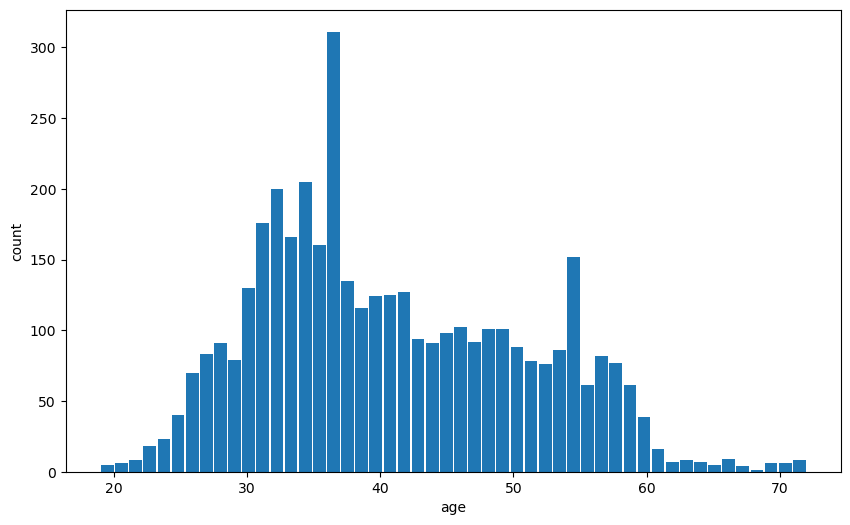

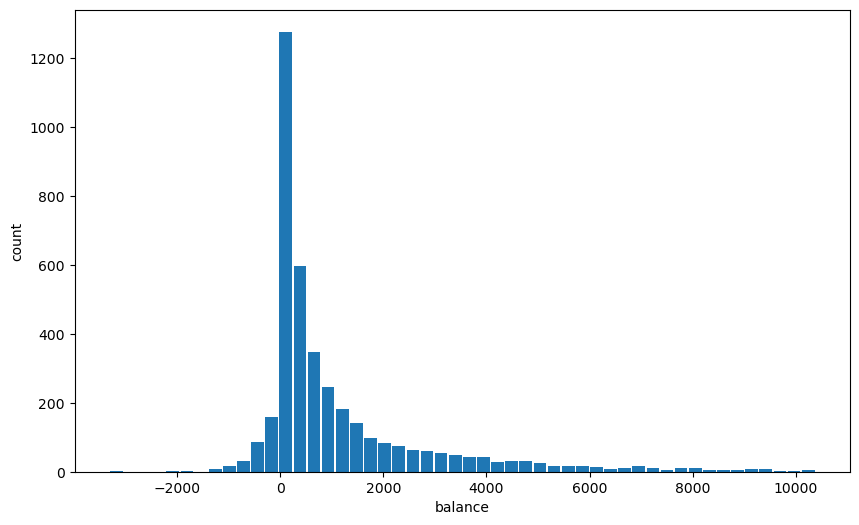

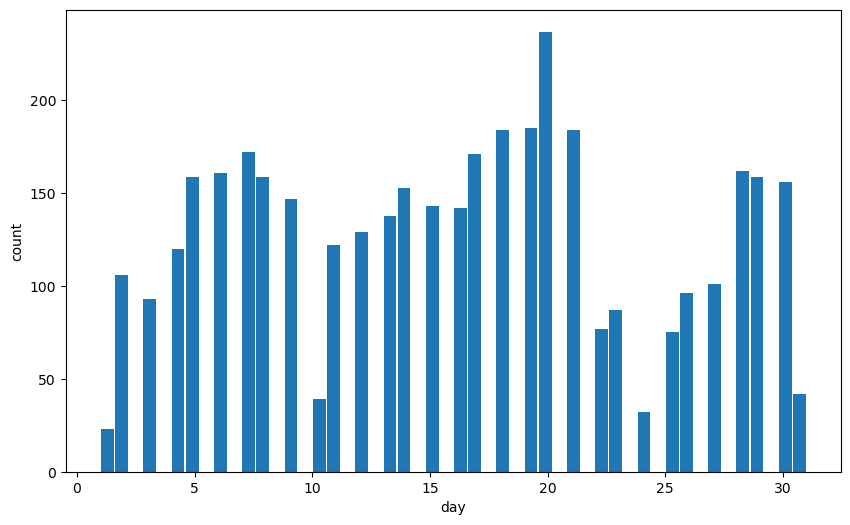

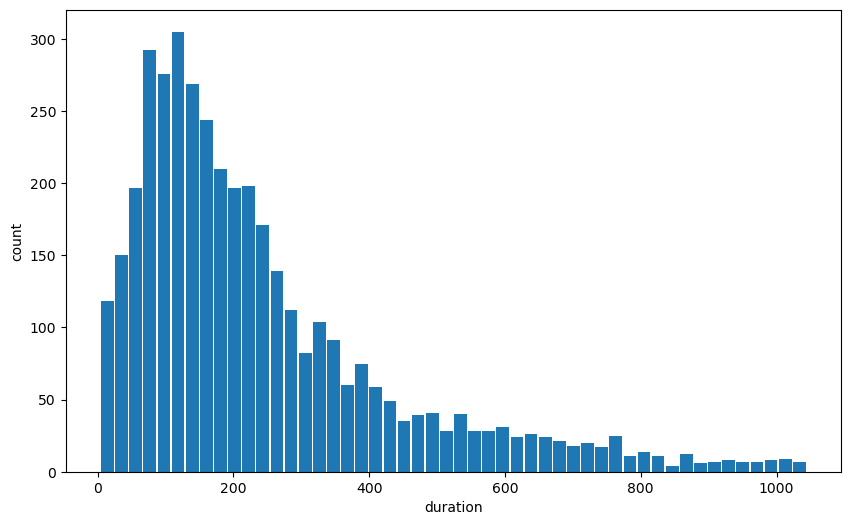

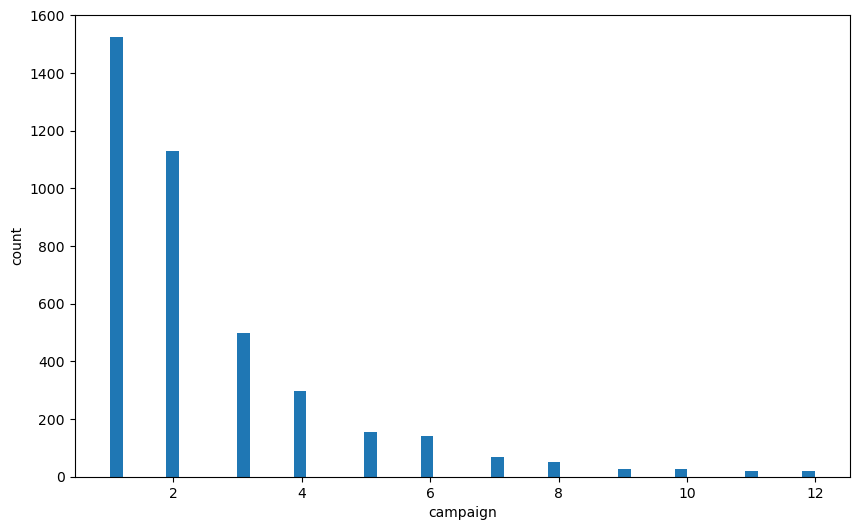

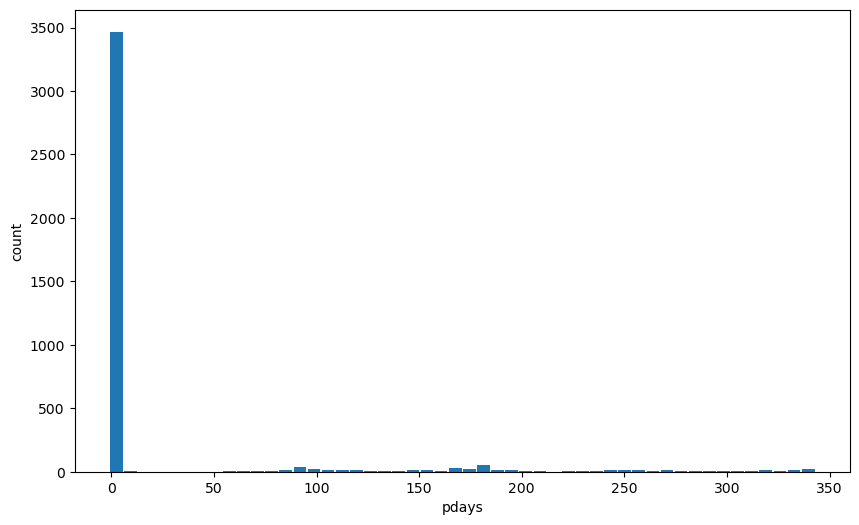

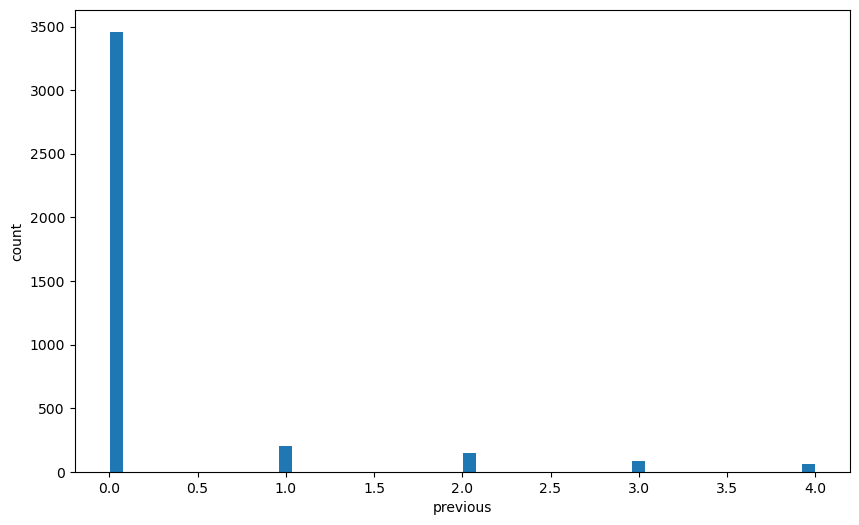

In [ ]:
show_hist(df, 'age')
show_hist(df, 'balance')
show_hist(df, 'day')
show_hist(df, 'duration')
show_hist(df, 'campaign')
show_hist(df, 'pdays')
show_hist(df, 'previous')

  - **IQR Method**: Calculated the Interquartile Range for each column, considering data points outside 1.5 * IQR from the Q1 and Q3 as outliers. This method is particularly effective for datasets with skewed distributions.


In [ ]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)


In [ ]:
df = pd.read_csv("bank.csv", sep=';')

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns)

      age  balance  day  duration  campaign  pdays  previous
0      30     1787   19        79         1     -1         0
1      33     4789   11       220         1    339         4
2      35     1350   16       185         1    330         1
3      30     1476    3       199         4     -1         0
4      59        0    5       226         1     -1         0
...   ...      ...  ...       ...       ...    ...       ...
4516   33     -333   30       329         5     -1         0
4517   57    -3313    9       153         1     -1         0
4518   57      295   19       151        11     -1         0
4519   28     1137    6       129         4    211         3
4520   44     1136    3       345         2    249         7

[4521 rows x 7 columns]


In [ ]:
def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [ ]:
for column in numeric_columns:
    df = remove_outliers_IQR(df, column)

def show_hist(df, column):
    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()


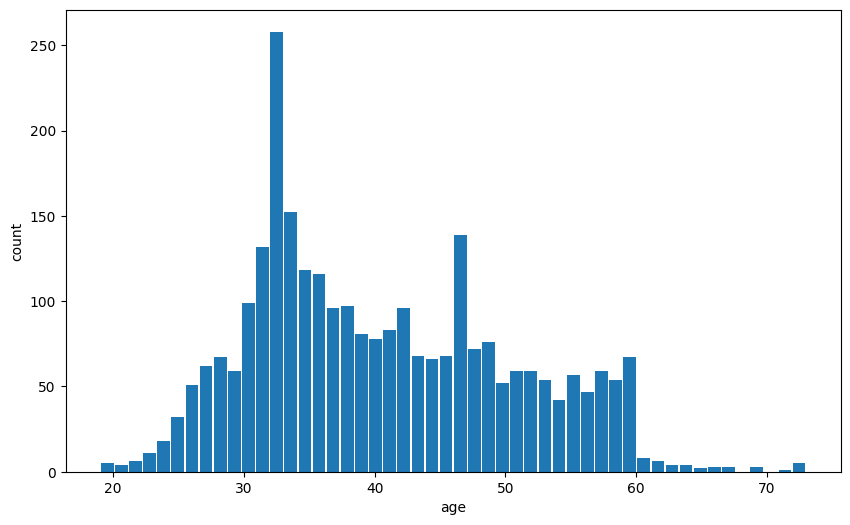

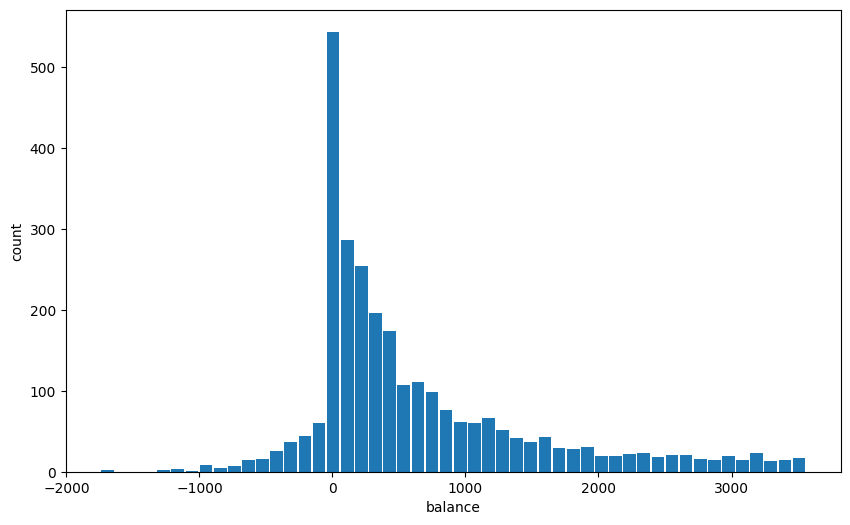

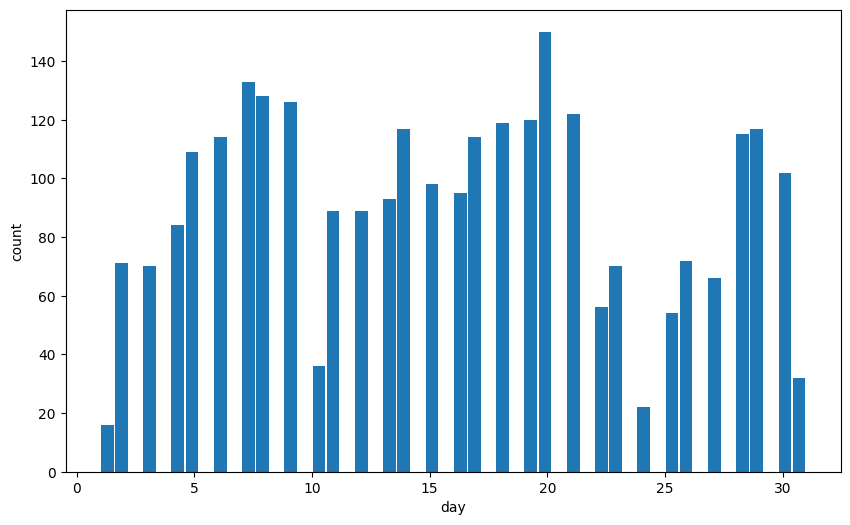

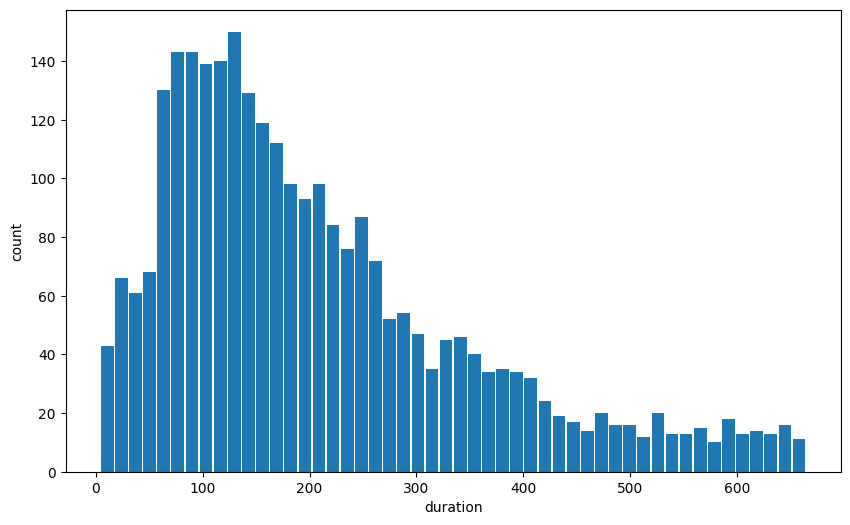

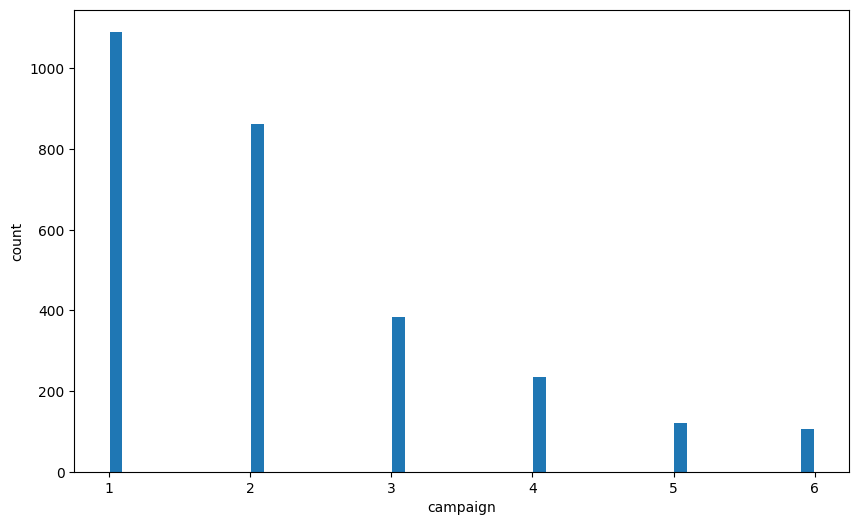

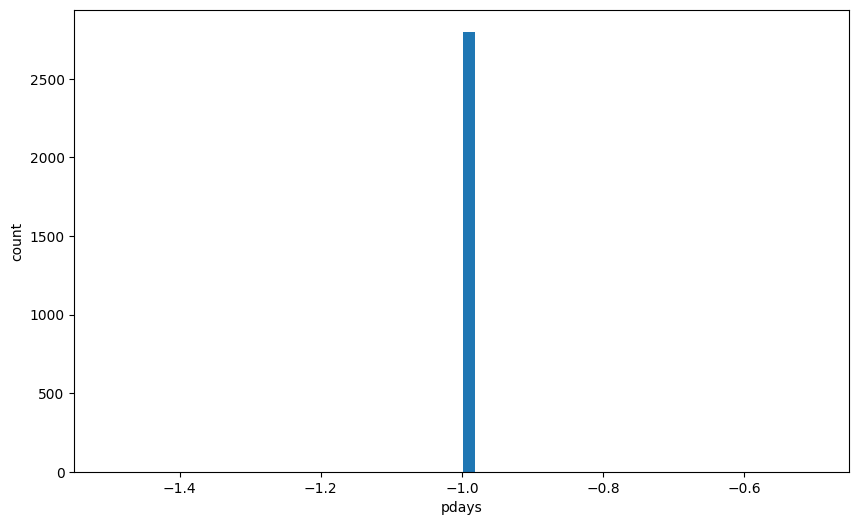

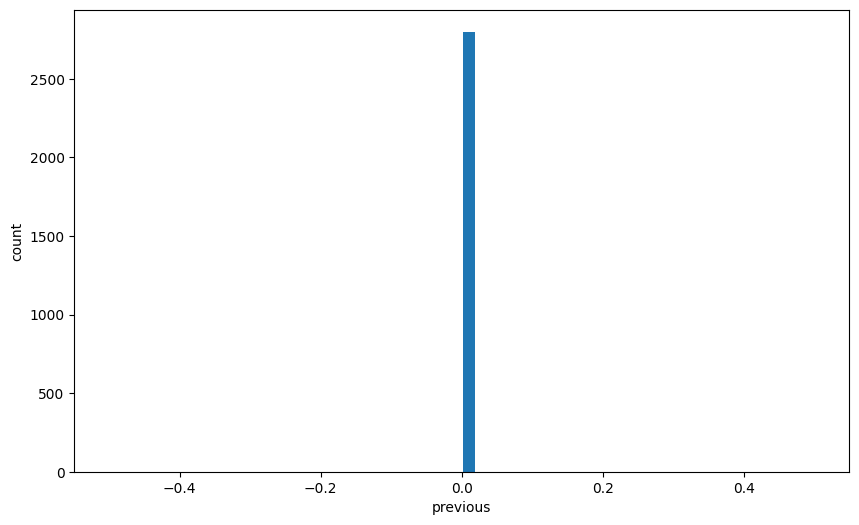

In [ ]:
for column in numeric_columns:
    show_hist(df, column)


## 4. Exploratory Data Analysis (EDA)

**Descriptive Statistics**: Provides a summary of central tendencies, dispersion, and shape of the dataset's distribution.

**Visualization**:
- Histograms and box plots for individual variables to understand distributions.
- Scatter plots and correlation matrices to explore relationships between variables.

**Analysis of Variable Relationships**: Detailed investigation into how different customer attributes relate to the campaign's outcome, identifying key factors that influence a customer's decision to subscribe to a term deposit.


## 5. Final Recommendations

**Analysis Summary**: The EDA reveals that outlier treatment significantly improves the dataset's quality, enhancing model accuracy.

**Recommendations**: Based on our analysis, targeted marketing strategies should focus on customers within specific age groups and job categories showing higher subscription rates. Additionally, campaign efforts should be optimized based on the insights from the duration and frequency of contacts.


## 6. Conclusion and Future Research Directions

**Conclusion**: Outlier detection and treatment using Z-score and IQR methods have proven to be crucial steps in preprocessing for predictive modeling in bank marketing campaigns.

**Future Research Directions**: Future studies could explore advanced outlier detection techniques and their impact on different types of predictive models. Additionally, incorporating external factors such as economic indicators could further refine customer segmentation and targeting strategies.


## 7. References

**GitHub Repository Link**: [Insert GitHub Repo Link] - Contains all code, datasets, and detailed analysis results for this project.
